Introduction to Machine Learning with Python.

# Classifying Iris Species

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
%matplotlib inline

### Meet the Data

In [2]:
from sklearn.datasets import load_iris
# Calling iris dataset -> Bunch object similar to a dictionary
data = load_iris()

In [4]:
# Keys of iris dataset
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Exploring Data set

In [5]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# Names for output to predict
print(f'''Target names: {data.target_names}\n
Feature names: {data.feature_names}\n
Type (Data): {type(data.data)}\n
Shape: {data.data.shape}\n
Target array -> 0 means setosa, 1 means versicolor. 2 means virginica
{data.target}''')

Target names: ['setosa' 'versicolor' 'virginica']

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Type (Data): <class 'numpy.ndarray'>

Shape: (150, 4)

Target array -> 0 means setosa, 1 means versicolor. 2 means virginica
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Building a Classification Model

1) Splitting the data: A good "rule of thumb" to divide the dataset into trainning set and test data is: 
    - 75% of the dataset for training.
    - 25% for testing.



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], random_state=0)

In [4]:
iris_df = pd.DataFrame(X_train, columns=data.feature_names)
iris_df['outcome'] = y_train
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),outcome
0,5.9,3.0,4.2,1.5,1
1,5.8,2.6,4.0,1.2,1
2,6.8,3.0,5.5,2.1,2
3,4.7,3.2,1.3,0.2,0
4,6.9,3.1,5.1,2.3,2
...,...,...,...,...,...
107,4.9,3.1,1.5,0.1,0
108,6.3,2.9,5.6,1.8,2
109,5.8,2.7,4.1,1.0,1
110,7.7,3.8,6.7,2.2,2


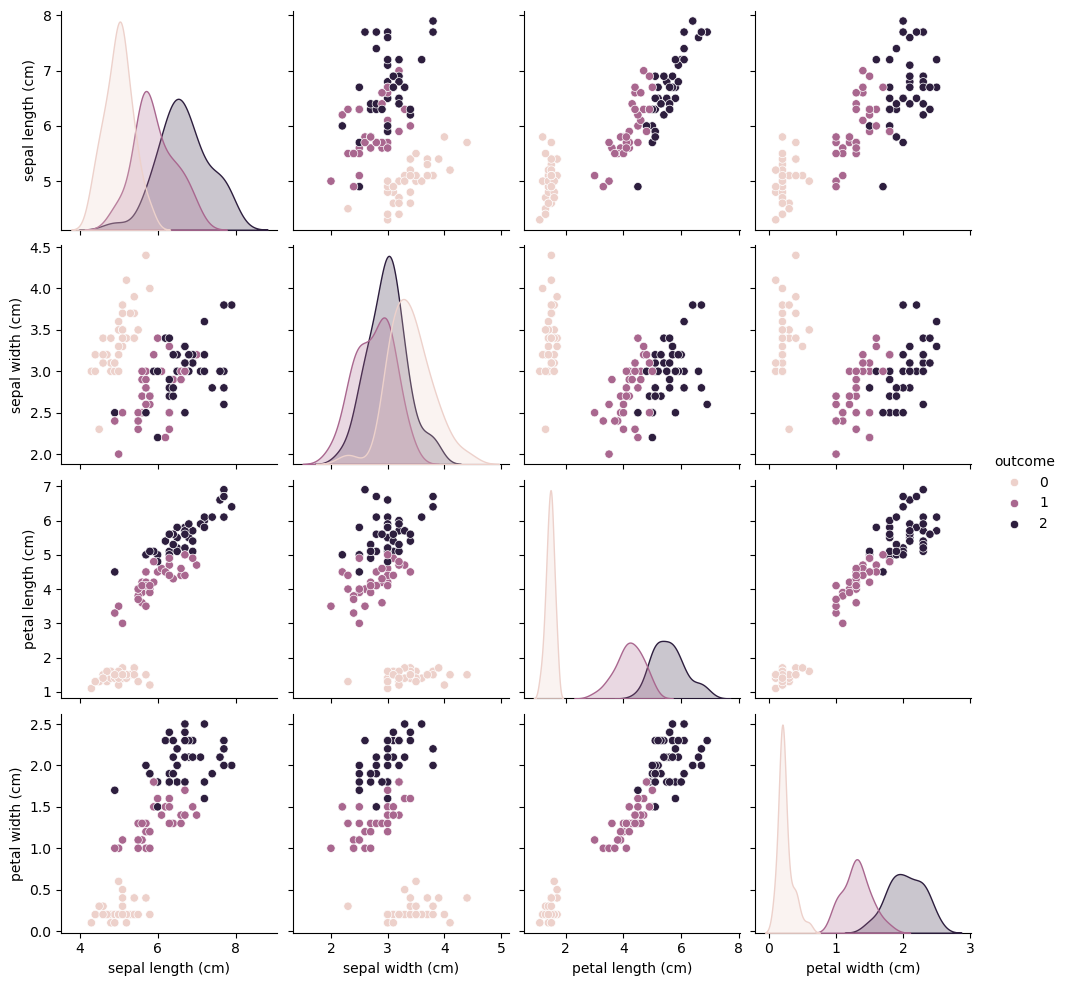

In [5]:
sns.pairplot(iris_df, hue='outcome')

### K-Nearest Neighbors Classifier

- Initializing and fitting.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Instance estimator class
knc = KNeighborsClassifier(n_neighbors=1)

In [8]:
knc

KNeighborsClassifier(n_neighbors=1)

In [9]:
# Fitting the estimator using fit method
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
# See parameters
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

- Making predictions

In [11]:
x_new = np.array([[5, 2.9, 1, 0.2]])
x_new.shape

(1, 4)

In [12]:
prediction = knc.predict(x_new)
print(f"Prediction: {prediction}")
print(f"Predicted target name: {data.target_names[prediction]}")
 

Prediction: [0]
Predicted target name: ['setosa']


- Evaluating

In [13]:
# Using test data
y_predicted = knc.predict(X_test)
y_predicted

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [14]:
np.mean(y_predicted == y_test) # 37/38 = 0.97

0.9736842105263158

In [15]:
# Using score method
knc.score(X_test, y_test) # 0.97 accuracy

0.9736842105263158